<a href="https://colab.research.google.com/github/karenyxwang/Machine_Learning/blob/master/Project%201%20-%20LendingClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the Data 
Keep this if you are working in Google Colab. Delete this if you are working on your own computer and have the data downloaded already. 

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3' -O lendingclub.csv

--2020-05-07 02:28:03--  https://docs.google.com/uc?export=download&id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3
Resolving docs.google.com (docs.google.com)... 64.233.189.139, 64.233.189.138, 64.233.189.101, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5k7os2v64p4q2rgpq7c1o62rpliivlsm/1588818450000/09819396713149841370/*/0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3?e=download [following]
--2020-05-07 02:28:05--  https://doc-10-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5k7os2v64p4q2rgpq7c1o62rpliivlsm/1588818450000/09819396713149841370/*/0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3?e=download
Resolving doc-10-5c-docs.googleusercontent.com (doc-10-5c-docs.googleusercontent.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to d

# Introduction to homework 1
On Canvas (or in this notebook's files) you’ll find a new file, **lendingclub.csv**. Each row of this file represents a single user
account on **LendingClub.com**. The site consists of two types of users, **borrowers** who are applying for a new loan, and **investors** who lend money for fixed periods of time. Each row in our dataset represents a single borrower at the time they apply for their first peer-to-peer loan, and each row contains nine columns:

- Amount requested for their first loan
- Year the loan was requested (this dataset covers only a five-year period, 2008-2012)
- Title of the loan application (written by the borrower)
- FICO score (credit rating) of the borrower
- “Debt-to-Income”: A ratio of the borrower’s total monthly debt payments, excluding home
mortgage and the requested loan, to the borrower’s self-reported monthly income.
- ZIP code of the borrower (the last two digits of each ZIP are masked for anonymity)
- U.S. state that the borrower resides in.
- Length of time that the borrower has been employed at their current job, from 0 to 10+ years.
- A binary outcome variable for whether the user’s loan application was accepted by investors.

Our goal with this project will be to automatically predict whether a borrower will be approved for a loan from the investor members of the website, based only on the data provided above. For each of the following questions, add a series of code and markdown cells to develop an easily readable report responding to the question. 

# Question 1:
- Why is this data about users valuable to LendingClub?
- Name at least two different ways this automated prediction could be used either for in-app product changes, or business decision-making.

Part 1:

The data about users is valuable to LendingClub in mainly three ways.

First of all, the data helps LendingClub understand its users. The data provided in this homework contains the information about borrowers, which enables LendingClub to analyze the characteristics of the borrowers (where do they come from/how long have they been employed/what is the reason for borrowing, etc.) as well as their behaviors (how much do they borrow). Such information could help LendingClub better meet the need of the existing users and expand its users base by marketing to targeted consumer groups.

Secondly, the data helps LendingClub to evaluate its performance. As a peer-to-peer lending platform, LendingClub may want to know if the platform is successfully matching the users and lenders together. If the performance is not satisfactory, it could also be important to understand the characteristics of successful borrowers and unsuccessful borrowers. 

Last but not least, LendingClub can use this data to predict if the borrower will be successfully approved for a loan from the investor, thereby increasing the efficiency of the platform and predicting future trends.

Part 2:

The automated prediction could be used for in-app product changes. If the borrower is predicted to be accepted by investors, the app can automatically permit the borrower's request and post his/her request in the app. If the borrower is predicted to be rejected by investors, the app can automatically inform the borrower that his loan request will most likely to be rejected and therefore the borrower needs to adjust his/her request. In this way, LendingClub does not have to waste resources on borrowers who are most likely to be rejected.

The automated prediction could also be used for business decision-making. Based on the result of automated prediction, LendingClub could improve customer services targeting at borrowers who are predicted to be accepted by investors, thereby increasing customer retention rate. For example, for borrowers who are predicted to be accepted, LendingClub could more actively reach out to them, hear their concerns, and even provide better discounts. In this way, LendingClub could maximize the usage of its resources and increase its efficiency.

# Question 2: 
Train a decision tree classifier to predict loan acceptance based on the features provided. Write a report giving at minimum the following information on your model:
- Class distribution of the outcome labels.
- List of features you used from the data, including their name and data type (numeric or
nominal). For each feature, provide min, mean, and max values (if the feature is numeric) or
list all possible labels (if the feature is nominal).
- List of hyperparameter settings for the decision tree.
- Performance of the trained classifier, using metrics like accuracy, kappa, precision, and recall. You must provide a labeled confusion matrix.

You should NOT perform any optimization; all you need to do is train a single decision tree and report results. You will be tuning hyperparameters and performing other evaluations in Homework 2.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay

# Read the LendingClub data
lendingclub = pd.read_csv('lendingclub.csv')
lendingclub.head()

,amount,date,title,fico,dti,zip,state,emp_length,policy_code,year,outcome
0,2500.0,Dec-2011,bike,740.0,1.00,309xx,GA,< 1 year,1.0,2011,accept
1,12000.0,Dec-2011,Consolidation,675.0,10.78,913xx,CA,10+ years,1.0,2011,accept
2,21000.0,Dec-2011,Debt Cleanup,705.0,13.22,335xx,FL,10+ years,1.0,2011,accept
3,31825.0,Dec-2011,Debt Consolidation Loan,760.0,14.03,080xx,NJ,5 years,1.0,2011,accept
4,12000.0,Dec-2011,Debt Consolidation,725.0,16.70,088xx,NJ,10+ years,1.0,2011,accept


The prediction variable is 'outcome'. The class distributions of the outcome labels are 9245 'accept' and 71858 'reject'.

In [ ]:
# List the class distribution of the outcome labels.
lendingclub.groupby('outcome').count()

,amount,date,title,fico,dti,zip,state,emp_length,policy_code,year
outcome,,,,,,,,,,
accept,9245,9245,9245,9245,9245,9245,9245,9245,9245,9245
reject,71858,71858,71858,71858,71858,71858,71858,71858,71858,71858


The features include amount (amount requested for their first loan), fico (credit rating of the borrower), dti (ratio of the borrower’s total monthly debt payments), state (U.S. state that the borrower resides in), and emp_length (length of time that the borrower has been employed at their current job). Among the features, 'state' and 'emp_length' are nominal values. 

The labels of 'state' are as follows.


In [ ]:
# List all labels of nominal feature 'state'.
lendingclub.state.unique()

array(['GA', 'CA', 'FL', 'NJ', 'PA', 'MN', 'KS', 'LA', 'OR', 'MD', 'AR',
       'AZ', 'CO', 'MT', 'MA', 'NY', 'IL', 'TX', 'WA', 'KY', 'OH', 'WI',
       'NC', 'CT', 'MI', 'SC', 'VA', 'WV', 'RI', 'AL', 'NV', 'MO', 'OK',
       'UT', 'AK', 'HI', 'VT', 'NH', 'NM', 'SD', 'DE', 'DC', 'WY', 'MS',
       'ID', 'TN', 'IN', 'ME', 'IA', 'NE', 'ND'], dtype=object)

The labels of 'emp_length' are as follows.

In [ ]:
# List all labels of nominal feature 'emp_length'.
lendingclub.emp_length.unique()

array(['< 1 year', '10+ years', '5 years', '9 years', '6 years',
       '2 years', '3 years', '7 years', '8 years', '4 years', '1 year'],
      dtype=object)

Among the features, amount, fico, and dti are numerical values.

Their count, mean, standard deviation, min, quantiles, and max values are as follows.

In [ ]:
# List the count, std, quantile, min, mean, and max values of the numeric features 'amount', 'fico' and 'dti'.
lendingclub[['amount', 'fico', 'dti']].describe()

,amount,fico,dti
count,81103.000000,81103.000000,8.110300e+04
mean,12959.437855,603.010961,5.142695e+02
std,10315.880464,173.772811,1.700466e+04
min,500.000000,0.000000,-1.000000e+00
25%,5000.000000,585.000000,6.530000e+00
50%,10000.000000,653.000000,1.648000e+01
75%,20000.000000,691.000000,2.888000e+01
max,500000.000000,850.000000,3.418800e+06


The list of hyperparameter settings for the decision tree are as follows:

criterion: entropy. The purity criterion uses information gain to measure leaf purity.

min_impurity_decrease: 0.0001. The purity threshold limits the size of the tree. Impurity 0.0001 is a measure of how homogenous any particular leaf of our tree is. It's set to be 0.0001 because a high purity threshold could  significantly hurts model's performance

min_samples_split: 20. The minimum split size parameter adds a constraint that only allows the model to have more than 20-instance splits. This controls for the complexity of the tree and prevents the model from overfitting.

In [ ]:
# List the features from the data
features = ["amount", "fico", "dti", "state", "emp_length"]

# Prepare our dataset
X = lendingclub.loc[:, features]
X = pd.get_dummies(X)
y = lendingclub["outcome"]

# Use scikit-learn to create train/test split and train the decision tree
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123)
model = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.0001, min_samples_split=20, random_state=123).fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

This part evaluates the performance of the trained classifier, using metrics including accuracy, kappa, precision, and recall. 

Accuracy measures the number of accurate predictions. While the accuracy on the train set is 96.1%, the accuracy on the test set is 95.9%. This shows that the model has a relatively high accuracy.

Cohen's Kappa measures accuracy after accounting for chance. While the Cohen's Kappa on the train set is 0.804, it is 0.797 on the test set. This shows that even after accounting for chance, the model has a relatively high accuracy.

Prediction measures the successful predictions among the predicted positives. Recall measures the successful predictions among the actual positives. While the precision score is 0.835, recall score is 0.804, meaning that there is a balance between precision and recall of the model.

The labeled confusion matrix is provided. Confusion matrix is a contingency table that visualizes the correct and wrong predictions. From the table we could see that there are 15556 correct cases and 663 wrong cases. Among the correct cases, 14050 are 'accept' and 1506 are 'reject'.

In [ ]:
# Calculate and display accuracy on the train and test sets
train_accuracy = 100*accuracy_score(y_train, train_pred)
test_accuracy = 100*accuracy_score(y_test, test_pred)
print(f"Accuracy on the train set: {train_accuracy:.1f}")
print(f"Accuracy on the test set: {test_accuracy:.1f}")

# Calculate and display Cohen's Kappa on the train and test sets
train_kappa = cohen_kappa_score(y_train, train_pred)
test_kappa = cohen_kappa_score(y_test, test_pred)
print(f"Cohen's Kappa on the train set: {train_kappa:.3f}")
print(f"Cohen's Kappa on the test set: {test_kappa:.3f}")

# Compute Precision and Recall Manually
# Compute number of predictions, number of correct predictions, and number of total positives
predictions = test_pred
actual = np.array(list(y_test))
predicted_positives = (predictions == "accept").sum()
actual_positives = (actual == "accept").sum()
successful_predictions = 0

for i in range(len(predictions)):
    if predictions[i] == "accept" and actual[i] == "accept":
        successful_predictions += 1

# Compute Precision Manually
precision = successful_predictions / predicted_positives
print(f"Precision: {precision:.3f}")

# Compute Recall Manually
recall = successful_predictions / actual_positives
print(f"Recall: {recall:.3f}")

Accuracy on the train set: 96.1
Accuracy on the test set: 95.9
Cohen's Kappa on the train set: 0.804
Cohen's Kappa on the test set: 0.797
Precision: 0.835
Recall: 0.804


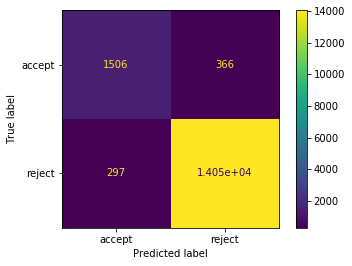

In [ ]:
# Generate confusion matrix with scikit-learn
conf_matrix = confusion_matrix(actual, predictions)
ConfusionMatrixDisplay(conf_matrix, ["accept", "reject"]).plot(values_format='.4g')
plt.show()

# Question 3: 

Is the decision tree that you trained accurate enough to be used for each of the two business purposes you proposed in question 1? Why or why not?

The decision tree could be used to facilitate the business purposes I proposed in question 1. Its accuracy rate is more than 95%, its Cohen's Kappa is around 80%, while its precision and recall rate are more than 80%. Therefore we can be sure that the model will be correct in the majority of times. However, given the 80% recall rate, it is still very likely for the decision tree to wrongly categorize a borrower as "rejected" when he/she actually will be accepted. This will lead to serious consequences if the app filters borrowers' loan requests purely based on the prediction of decision tree, because the app is likely to turn down potential qualified borrowers. Meanwhile, given the 84% precision rate, it is also possible for LendingClub to waste its resources on borrowers who should've been rejected. 

Therefore, while LendingClub can certainly use the decision tree to facilitate the business purposes I mentioned, the company should also closely monitor the prediction results, observe and manually decide on the suspected cases, as well as correct the mistakes. 

# Scoring Rubric
![alt text](https://docs.google.com/uc?export=view&id=1ELG4QWnPjWgiUJI0eL6YiVbMWKlSVdcP)
